## Country-Data

### Группа

* 22П-3
### Команда

* Рахмаев Данил
* Михайлов Евгений

## Информация о датасете

Датасет содержит информацию о различных показателях по странам, что позволит нам проводить анализ и сравнение их экономических и социальных условий.

Набор данных в данном датасете позволяет исследовать отношение между различными экономическими и социальными характеристиками стран, выявлять закономерности и проводить кластеризацию для группировки стран по схожести показателей. Анализ этих данных может способствовать улучшению понимания глобальных трендов и формированию политик в области здравоохранения и экономики.

Модели которые мы будем использовать для обучения:

1. LogisticRegression
2. RandomForestClassifier
3. SVC

## Импортируем библиотеки


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import warnings

In [128]:
import warnings
warnings.filterwarnings('ignore')

## Загружаем данные

In [129]:
df = pd.read_csv('/Users/evgenijmihajlov/Учебный материал/machine learning/Files/Country-data.csv')

In [130]:
# Выводим первые 5 строк данных
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


В датасете 163 записи и 10 признаков

* Country – название страны.

* Child_mort – коэффициент детской смертности.

* Exports – объем экспорта.

* Health – процент расходов на здравоохранение.

* Imports – объем импорта.

* Income – доход.

* Inflation – инфляция.

* Life_expect – ожидаемая продолжительность жизни.

* Total_fer – общий коэффициент рождаемости.

* GDPP – ВВП на душу населения.(целевая переменная)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [132]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Аномальные значения присутствуют в признаки gdpp

In [133]:
df[df['gdpp'] > 60000]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600


In [134]:
df = df[df['gdpp'] <= 60000]

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,39.089571,40.025761,6.795460,46.521877,15513.269939,7.869319,70.299387,2.976319,11210.515337
std,40.474921,25.536506,2.718721,23.215691,15822.640217,10.677805,8.846381,1.520952,14510.029025
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.650000,23.650000,4.920000,30.550000,3330.000000,1.810000,64.950000,1.820000,1310.000000
50%,19.800000,35.000000,6.220000,43.300000,9930.000000,5.390000,72.800000,2.470000,4560.000000
75%,62.200000,50.950000,8.525000,58.750000,21450.000000,11.000000,76.650000,3.995000,13000.000000
max,208.000000,200.000000,17.900000,174.000000,80600.000000,104.000000,82.800000,7.490000,58000.000000


In [135]:
from sklearn.preprocessing import StandardScaler
countries = df['country']
df_numeric = df.drop(columns=['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)
scaled_df['country'] = countries


In [136]:
scaled_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.266659,-1.179421,0.289459,-0.070077,-0.881403,0.147551,-1.598714,1.875433,-0.736757,Afghanistan
1,-0.557354,-0.472376,-0.090563,0.089790,-0.353953,-0.317456,0.680403,-0.874719,-0.492243,Albania
2,-0.292179,-0.063860,-0.968673,-0.653372,-0.165669,0.773197,0.703081,-0.056928,-0.466665,Algeria
3,1.980404,0.874939,-1.455692,-0.156491,-0.609437,1.365024,-1.156498,2.099666,-0.530956,Angola
4,-0.713486,0.215030,-0.282419,0.534822,0.227382,-0.603975,0.737098,-0.558155,0.068403,Antigua and Barbuda
...,...,...,...,...,...,...,...,...,...,...
158,-0.245091,0.258238,-0.570203,0.266939,-0.796453,-0.493125,-0.827670,0.345372,-0.569669,United Kingdom
159,-0.544963,-0.452735,-0.695647,-1.249629,0.062554,3.572633,0.578353,-0.333922,0.158273,United States
160,-0.391310,1.255958,0.016433,1.455133,-0.698824,0.397434,0.317559,-0.676867,-0.684425,Uruguay
161,0.426523,-0.393815,-0.596030,-0.523751,-0.699458,1.477753,-0.317419,1.116998,-0.684425,Uzbekistan


<Figure size 1500x1000 with 0 Axes>

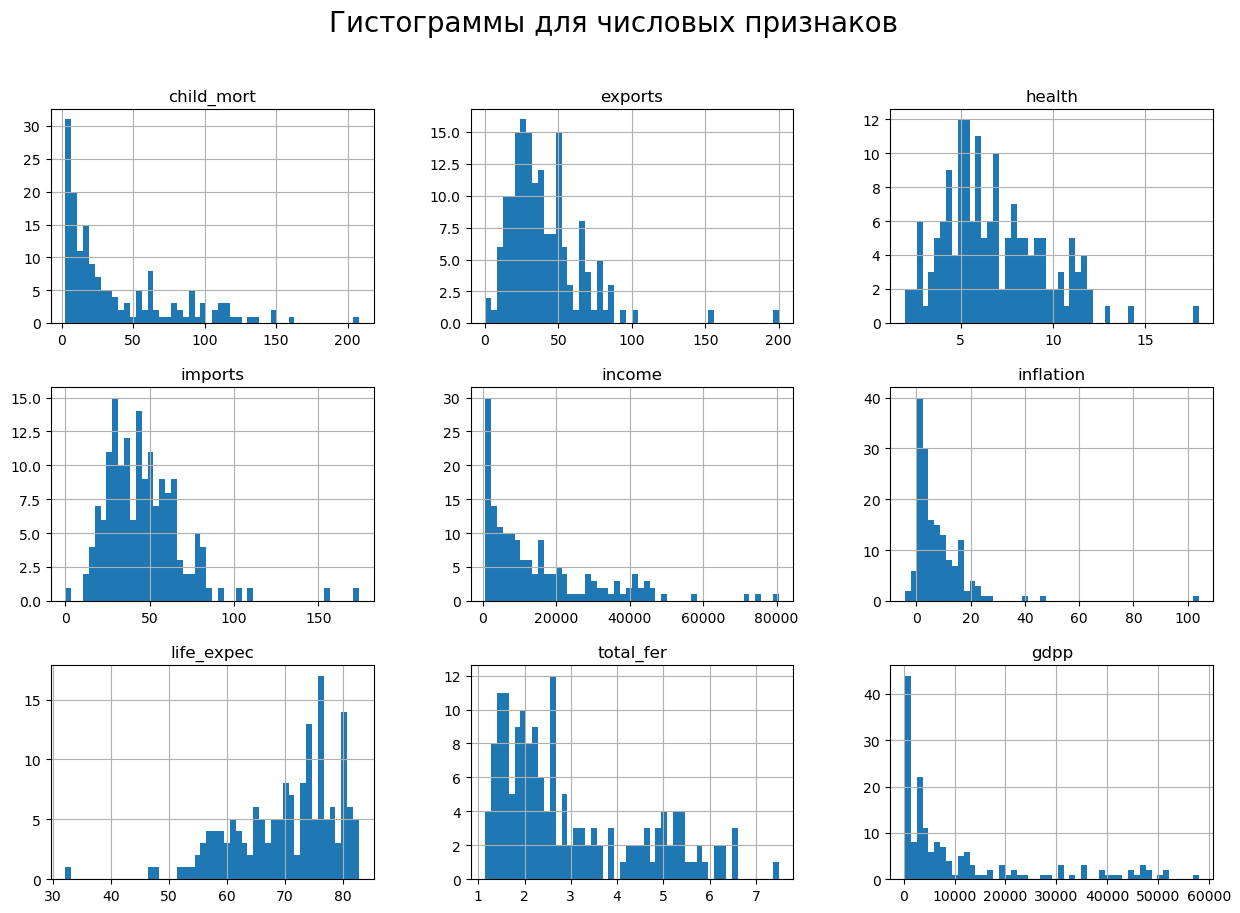

In [137]:
plt.figure(figsize=(15, 10))
df_numeric = df.select_dtypes(include=np.number)
df_numeric.hist(bins=50, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Гистограммы для числовых признаков', fontsize=20)
plt.show()

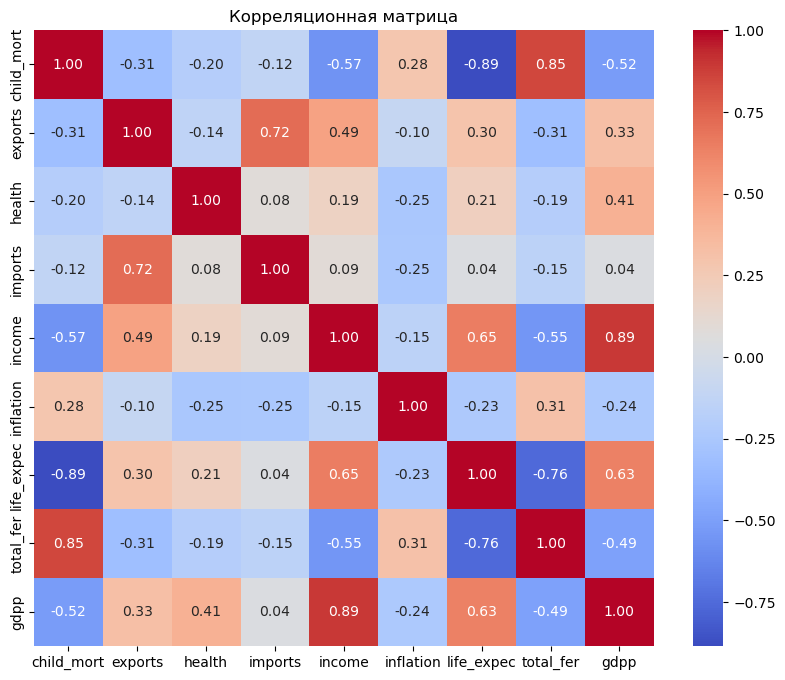

In [138]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [139]:
#df[['income', 'gdpp']] = np.log1p(df[['income', 'gdpp']])


In [140]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Inertia')

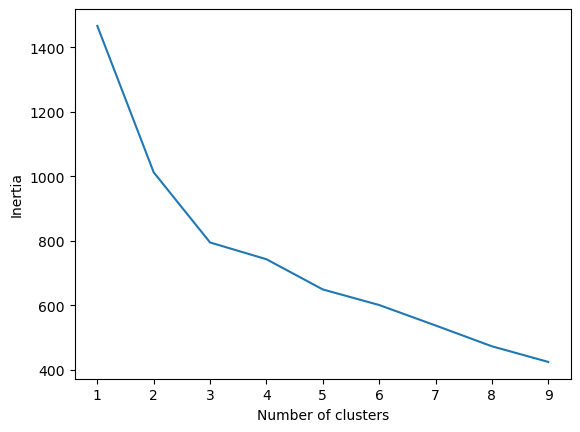

In [141]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

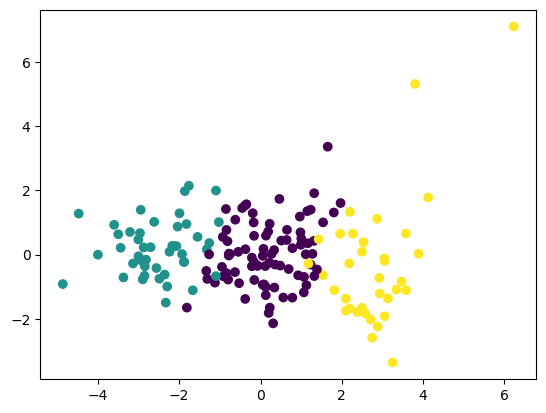

In [142]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')

In [143]:
df['cluster'] = clusters

In [144]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


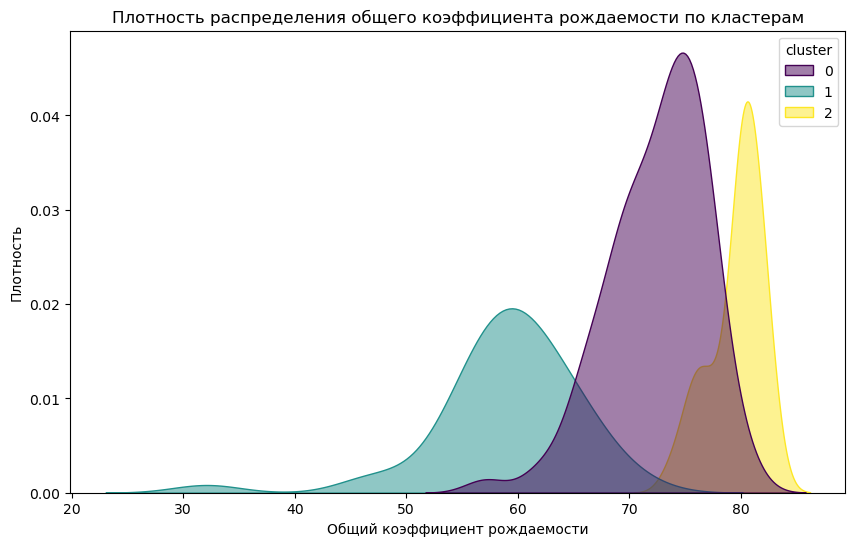

In [145]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='life_expec', hue='cluster', fill=True, palette='viridis', alpha=0.5)
plt.title('Плотность распределения общего коэффициента рождаемости по кластерам')
plt.xlabel('Общий коэффициент рождаемости')
plt.ylabel('Плотность')
plt.show()

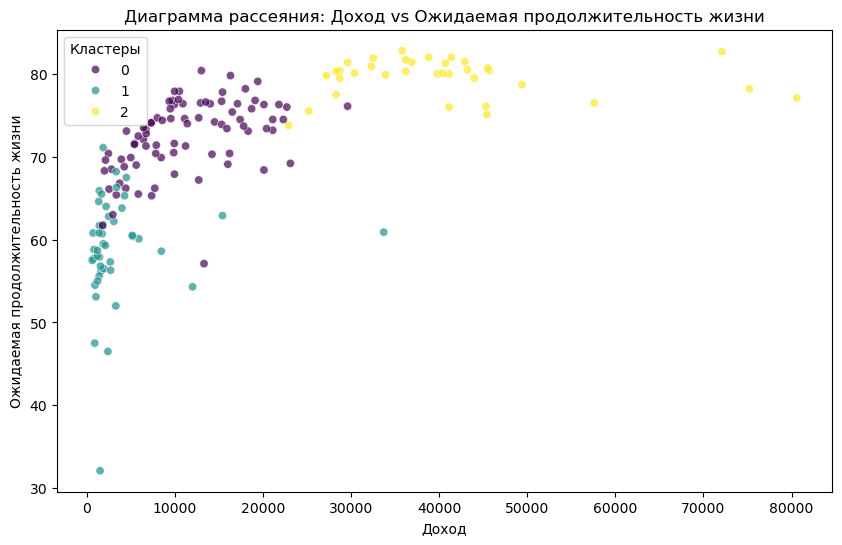

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='life_expec', hue='cluster', palette='viridis', alpha=0.7)
plt.title('Диаграмма рассеяния: Доход vs Ожидаемая продолжительность жизни')
plt.xlabel('Доход')
plt.ylabel('Ожидаемая продолжительность жизни')
plt.legend(title='Кластеры')
plt.show()

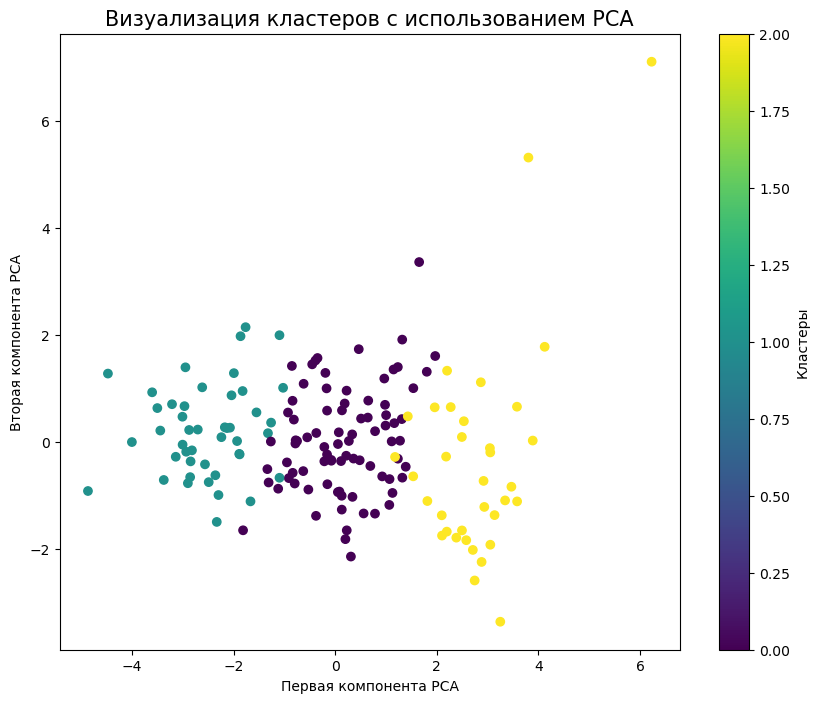

In [147]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Визуализация кластеров с использованием PCA', fontsize=15)
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.colorbar(label='Кластеры')
plt.show()

In [148]:
y = df['cluster'] 
X = df.drop(columns=['country', 'cluster'])  

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=48
)

## LogisticRegression

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.92      0.92      0.92        12
           2       0.80      0.89      0.84         9

    accuracy                           0.91        54
   macro avg       0.88      0.90      0.89        54
weighted avg       0.91      0.91      0.91        54



## RandomForestClassifier

In [151]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=46)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9814814814814815
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         9

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



## SVC

In [152]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.85      0.92      0.88        12
           2       1.00      1.00      1.00         9

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.95        54



## Вывод

В ходе работы был выполнен импорт данных о различных показателях стран. 
Данные были стандартизированы для адекватной кластеризации, и применены методы визуализации, такие как гистограммы и корреляционная матрица, что позволило выявить взаимосвязи между признаками.

Была проведена кластеризация с использованием метода KMeans, в результате которой выделены три кластера.

Были использованны такие модели классификации как: 

1. LogisticRegression
2. RandomForestClassifier
3. SVC

Все модели продемонстрировали хорошую точность в предсказании кластеров.